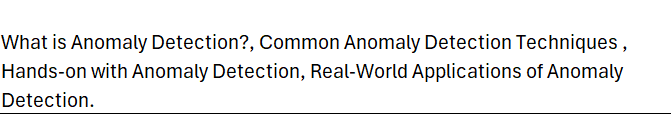

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [3]:
# !pip install openpyxl

In [4]:
df = pd.read_excel("data\Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [18]:
data = df.head(500)

In [19]:
data.shape

(500, 8)

In [ ]:
data.drop(
    columns=[
        "StockCode",
        "Description",
        "Country",
        "InvoiceNo"
    ],
    inplace=True,
)
data.head()

C:\Users\hp328\AppData\Local\Temp\ipykernel_5412\3355975929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(


,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,2010-12-01 08:26:00,2.55,17850.0
1,6,2010-12-01 08:26:00,3.39,17850.0
2,8,2010-12-01 08:26:00,2.75,17850.0
3,6,2010-12-01 08:26:00,3.39,17850.0
4,6,2010-12-01 08:26:00,3.39,17850.0


In [24]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,500.000000,500,500.000000,500.000000
mean,16.486000,2010-12-01 10:27:27.840000,3.608880,15666.764000
min,-24.000000,2010-12-01 08:26:00,0.100000,12431.000000
25%,3.000000,2010-12-01 09:41:00,1.250000,14307.000000
50%,6.000000,2010-12-01 10:29:00,2.100000,15862.000000
75%,12.000000,2010-12-01 11:21:00,3.950000,17511.000000
max,432.000000,2010-12-01 11:45:00,165.000000,18074.000000
std,38.615958,NaN,8.071726,1762.454843


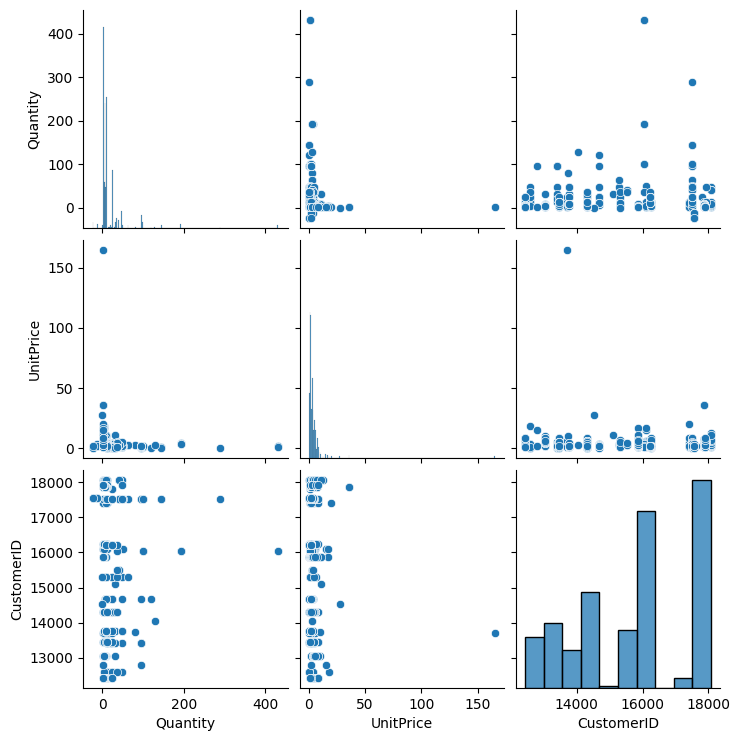

In [25]:
sns.pairplot(data)

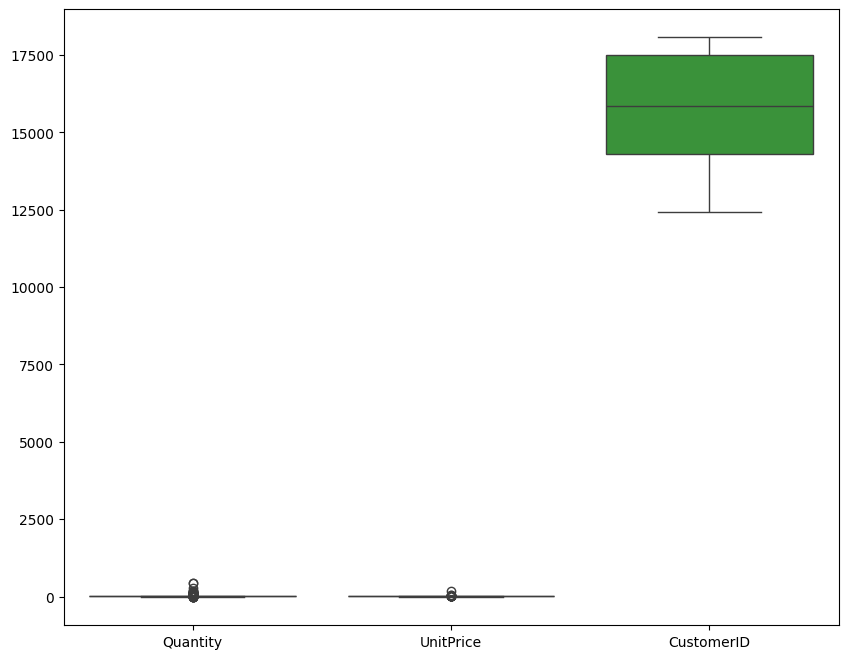

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data)
plt.show()

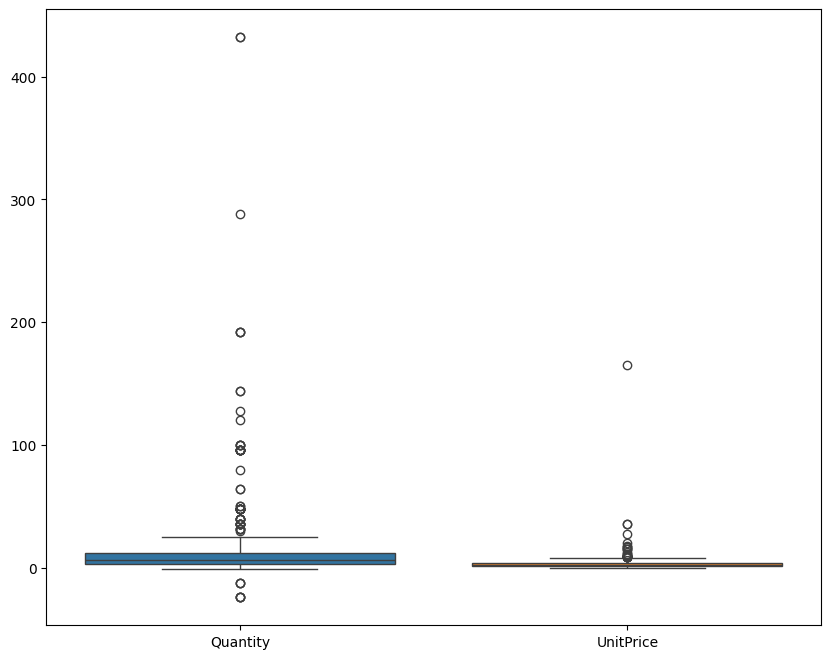

In [27]:
plt.figure(figsize=(10,8))
sns.boxplot(data[['Quantity','UnitPrice']])
plt.show()

In [28]:
from sklearn.decomposition import PCA

In [31]:
data = data.drop(columns=['InvoiceDate'])

In [32]:
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(data), columns=['C1','C2'])
pca_df.head()

,C1,C2
0,-2183.241463,-9.296340
1,-2183.241334,-9.311852
2,-2183.240356,-7.300374
3,-2183.241334,-9.311852
4,-2183.241334,-9.311852


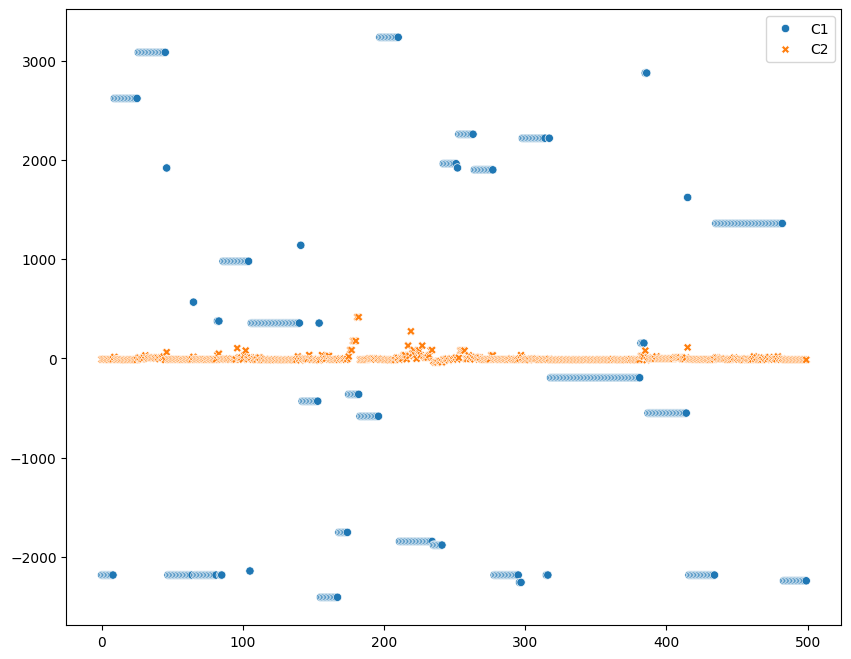

In [33]:
plt.figure(figsize=(10, 8))
sns.scatterplot(pca_df)
plt.show()

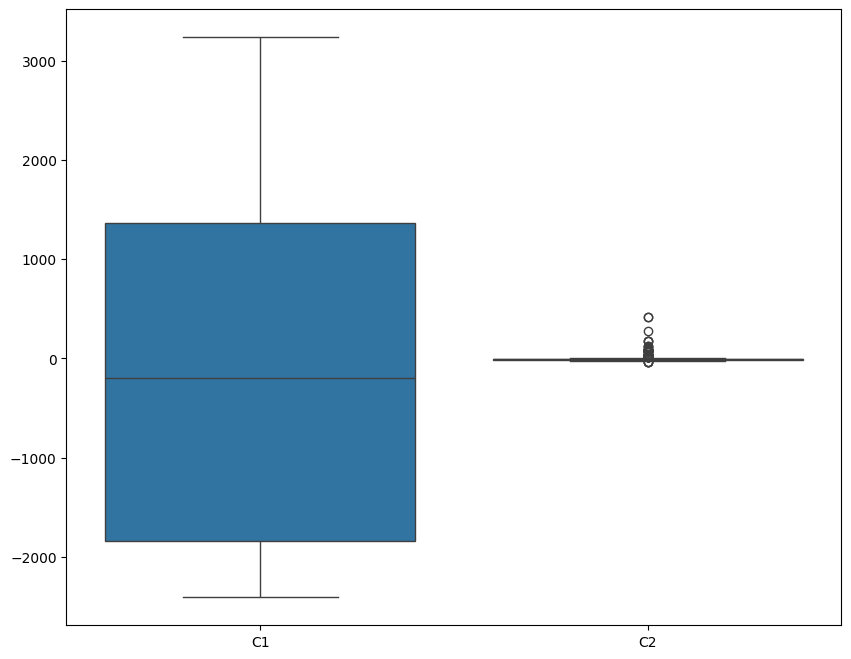

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(pca_df)
plt.show()

In [35]:
from scipy import stats


In [41]:
z_score1 = stats.zscore(pca_df['C1'])
z_score2 = stats.zscore(pca_df['C2'])
anamolies1 = pca_df['C1'][(z_score1>3)|(z_score1< -3)]
anamolies2 = pca_df['C2'][(z_score2>3)|(z_score2< -3)]
# print(f"{z_score1=}  {z_score2=}")
# print()

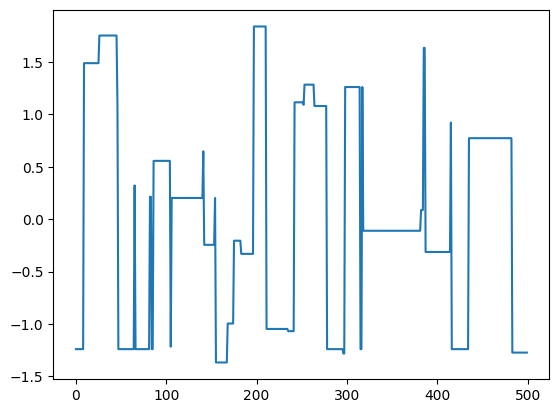

In [46]:
plt.plot(z_score1)

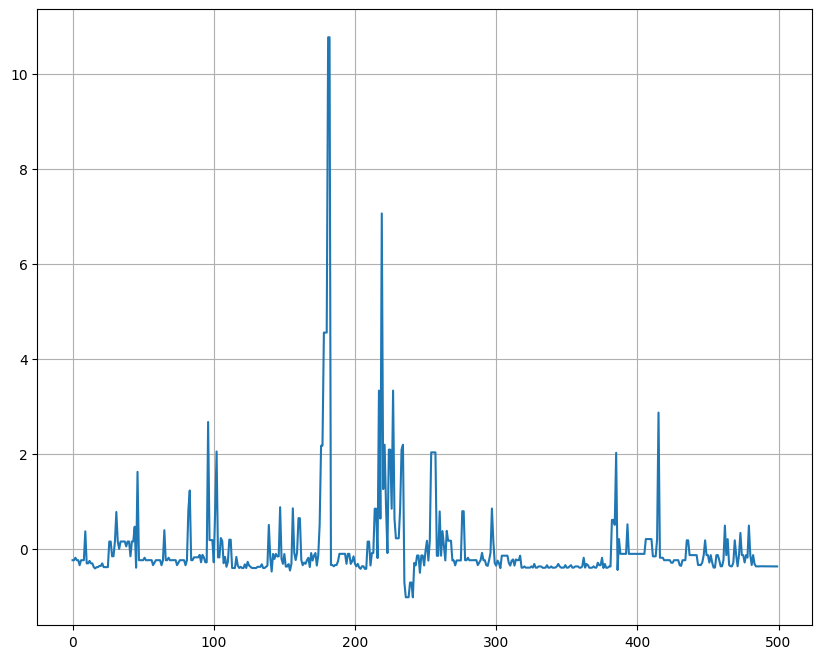

In [49]:
plt.figure(figsize=(10, 8))
plt.plot(z_score2)
plt.grid()
plt.show()

In [42]:
anamolies1

Series([], Name: C1, dtype: float64)

In [43]:
anamolies2

178    175.673988
179    175.682298
180    175.682298
181    415.676793
182    415.680486
217    128.533970
219    272.519365
227    128.539880
Name: C2, dtype: float64

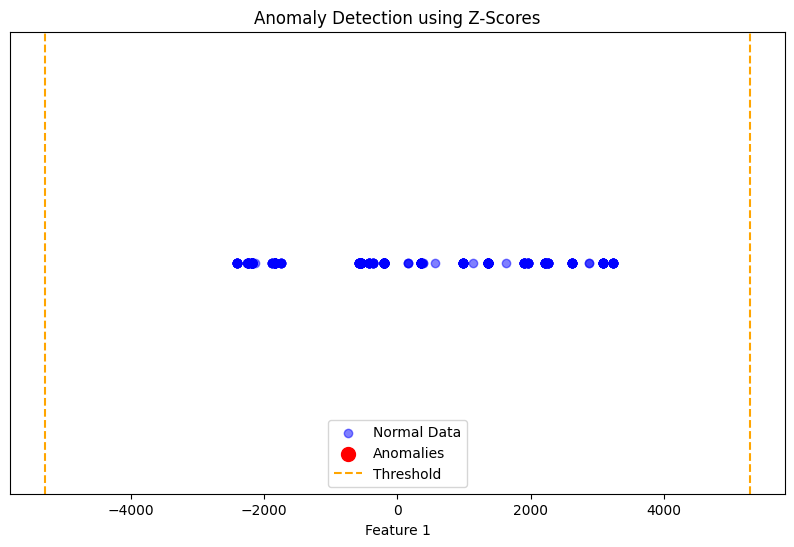

In [44]:
# Plotting the data
threshold = 3
plt.figure(figsize=(10, 6))
plt.scatter(
    pca_df["C1"],
    np.zeros_like(pca_df["C1"]),
    color="blue",
    label="Normal Data",
    alpha=0.5,
)
plt.scatter(
    anamolies1,
    np.zeros_like(anamolies1),
    color="red",
    label="Anomalies",
    s=100,
)
plt.axvline(
    x=threshold * pca_df["C1"].std() + pca_df["C1"].mean(),
    color="orange",
    linestyle="--",
    label="Threshold",
)
plt.axvline(
    x=-threshold * pca_df["C1"].std() + pca_df["C1"].mean(),
    color="orange",
    linestyle="--",
)
plt.title("Anomaly Detection using Z-Scores")
plt.xlabel("Feature 1")
plt.yticks([])  # Hide y-axis ticks
plt.legend()
plt.show()

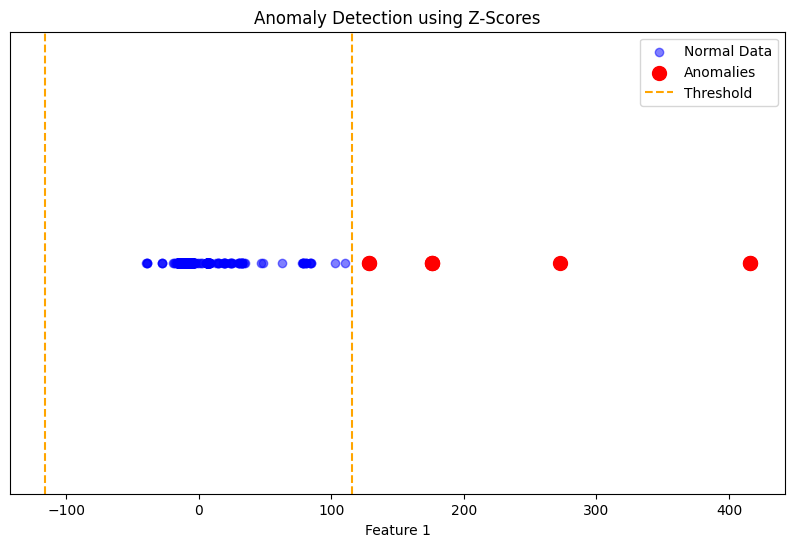

In [45]:
# Plotting the data
threshold = 3
plt.figure(figsize=(10, 6))
plt.scatter(
    pca_df["C2"],
    np.zeros_like(pca_df["C2"]),
    color="blue",
    label="Normal Data",
    alpha=0.5,
)
plt.scatter(
    anamolies2,
    np.zeros_like(anamolies2),
    color="red",
    label="Anomalies",
    s=100,
)
plt.axvline(
    x=threshold * pca_df["C2"].std() + pca_df["C2"].mean(),
    color="orange",
    linestyle="--",
    label="Threshold",
)
plt.axvline(
    x=-threshold * pca_df["C2"].std() + pca_df["C2"].mean(),
    color="orange",
    linestyle="--",
)
plt.title("Anomaly Detection using Z-Scores")
plt.xlabel("Feature 1")
plt.yticks([])  # Hide y-axis ticks
plt.legend()
plt.show()

In [ ]:
# from sklean.nei